# Dataset Description

**Source :**

https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption



**Data Set Information:**

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:
1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.



**Attribute Information:**

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a  dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Importing some common Packages and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import warnings
from sklearn.metrics import mean_squared_error

### Loading Dataset using pandas Package

In [2]:
Data = pd.read_csv("C:\\Users\\SS\\Downloads\\MDS Course files\\Data set\\household_power_consumption\\household_power_consumption.txt",sep=';')

C:\Users\SS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataset set is in txt format and also have data separated by ';'. So, we used sep argument to make correct dataframe / tabel

In [3]:
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## Checking Data Structure
-> Number of rows / instaces / enteries

-> Number of columns / features / attributes

In [4]:
print(f"Number of rows are {Data.shape[0]}. \nNumber of Columns are {Data.shape[1]}.")

Number of rows are 2075259. 
Number of Columns are 9.


## Information about columns

In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


Clearly from this we can see there are many features which are numbers in real but categorised as object.

So, we will change their types.

In [6]:
Data.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

To change the types of the columns, First we seprate Date, Time and Other Features then we **use apply function and .to_numeric function**

In [7]:
temp1 = Data[['Date', 'Time']]
temp1.head(2)

,Date,Time
0,16/12/2006,17:24:00
1,16/12/2006,17:25:00


In [8]:
temp1[['Date']] = temp1[['Date']].apply(pd.to_datetime)
temp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 2 columns):
Date    datetime64[ns]
Time    object
dtypes: datetime64[ns](1), object(1)
memory usage: 31.7+ MB


C:\Users\SS\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [9]:
temp1.head()

,Date,Time
0,2006-12-16,17:24:00
1,2006-12-16,17:25:00
2,2006-12-16,17:26:00
3,2006-12-16,17:27:00
4,2006-12-16,17:28:00


In [10]:
temp2 = Data[['Global_active_power', 'Global_reactive_power','Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
              'Sub_metering_3']]
temp2.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0


In [11]:
temp2 = temp2.apply(pd.to_numeric, errors='coerce')
temp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtypes: float64(7)
memory usage: 110.8 MB


In [12]:
Data = pd.concat([temp1,temp2],axis=1)
Data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


Now Data is ready with correct feature types

# Checking Missing Values

In [13]:
Data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

There are 25979 instances which are empty in our Data.

In [14]:
# creating bool series True for NaN values 
bool_series = pd.isnull(Data["Voltage"])  
    
# filtering data  
# displaying data only with Voltage = NaN  
Data[bool_series]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,2006-12-21,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,2006-12-21,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,2006-12-30,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,2006-12-30,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,2007-01-14,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61909,2007-01-28,17:13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98254,2007-02-22,22:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98255,2007-02-22,22:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142588,2007-03-25,17:52:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190497,2007-04-28,00:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Clearly, the 25979 rows are completely empty.
Now we fill these rows using **interpolate function** using linear method

In [15]:
Data = Data.interpolate(method ='linear') 

Checking again if there left any null values. 

In [16]:
Data.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

### Missing Values are handled

# Maximum and Minimum Datestamp

In [17]:
Data['Date'].min()

Timestamp('2006-12-16 00:00:00')

In [18]:
Data['Date'].max()

Timestamp('2010-12-11 00:00:00')

# Data Visualization

In [ ]:
plt.scatter(Data['Date'],Data['Voltage'])
plt.show()

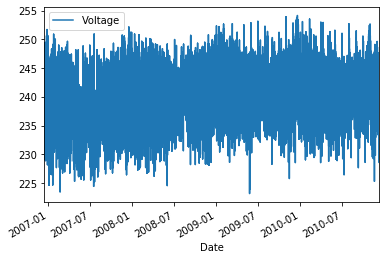

In [23]:
Data[['Voltage']].plot(figsize=[30,10],fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()

There is some trend and seasonality in voltage. But it is not clearly as Data is two large.

So, we group data by dates as we have data on per hour.

In [24]:
Data = Data.groupby('Date')
Data

In [25]:
Data.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
2006-12-17,00:00:00,1.044,0.152,242.73,4.4,0.0,2.0,0.0
2006-12-17,00:01:00,1.520,0.220,242.20,7.4,0.0,1.0,0.0
2006-12-17,00:02:00,3.038,0.194,240.14,12.6,0.0,2.0,0.0
2006-12-17,00:03:00,2.974,0.194,239.97,12.4,0.0,1.0,0.0


In [26]:
Data.tail()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,23:55:00,1.290,0.000,240.69,6.8,0.0,0.0,0.0
2006-12-16,23:56:00,2.730,0.060,239.43,11.4,0.0,1.0,0.0
2006-12-16,23:57:00,2.734,0.062,239.81,11.4,0.0,2.0,0.0
2006-12-16,23:58:00,2.764,0.066,241.27,11.4,0.0,1.0,0.0
2006-12-16,23:59:00,2.586,0.070,241.63,11.0,0.0,1.0,0.0
2006-12-17,23:55:00,0.276,0.122,245.63,1.2,0.0,1.0,0.0
2006-12-17,23:56:00,0.274,0.118,244.57,1.2,0.0,1.0,0.0
2006-12-17,23:57:00,0.274,0.116,244.19,1.2,0.0,1.0,0.0
2006-12-17,23:58:00,0.274,0.120,244.82,1.2,0.0,1.0,0.0


In [27]:
Data.info()

AttributeError: Cannot access callable attribute 'info' of 'DataFrameGroupBy' objects, try using the 'apply' method

20 Lakh enteries of opriginal Data changed to 1442 enteries

In [ ]:
Data[['Voltage']].plot(figsize=[30,10],fontsize=20,legend=False)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()

In [ ]:
Data[['Voltage']][0:913].plot(figsize=[30,10],fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()


In [ ]:
Data[['Voltage']][913:].plot(figsize=[30,10],fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()

In [ ]:
Data[['Global_active_power']][0:380].plot(figsize=[30,10],fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()

In [ ]:
Data[['Sub_metering_1']][0:380].plot(figsize=[30,10],fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()

In [ ]:
Data[['Sub_metering_2']][0:380].plot(figsize=[30,10],fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()

In [ ]:
Data[['Sub_metering_3']][0:380].plot(figsize=[30,10],fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Date',fontsize=30)
plt.show()